# Naive Bayes Algorithm - Basic Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
data_path = '/home/hp/Downloads/FML CODES!/Naive Bayes/PlayTennis.csv'
data = pd.read_csv(data_path)
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
data.drop(['day'], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['outlook'] = le.fit_transform(data['outlook'])
data['temp'] = le.fit_transform(data['temp'])
data['humidity'] = le.fit_transform(data['humidity'])
data['wind'] = le.fit_transform(data['wind'])
data['play'] = le.fit_transform(data['play'])

In [5]:
data

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [8]:
X = data.drop(['play'], axis=1)
y = data['play']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(11, 3, 11, 3)

In [9]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_preds_mnb = mnb.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

training_score = mnb.score(X_train, y_train)
testing_score = accuracy_score(y_true=y_test, y_pred = y_preds_mnb)

In [13]:
print(f'The training score is {training_score}')
print(f'The testing score is {testing_score}')

The training score is 0.7272727272727273
The testing score is 0.3333333333333333


In [14]:
print(classification_report(y_true=y_test, y_pred = y_preds_mnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/home/hp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/hp/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


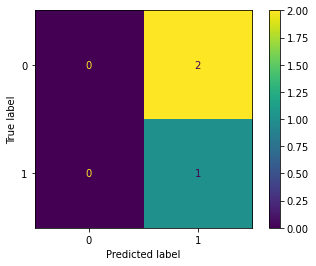

In [16]:
plot_confusion_matrix(mnb, X_test, y_test)